# Sklearn


The purpose of this notebook is to get you familair with the sklearn API for clustering.



** 1. ** Apply each Hierarachical, Kmeans and DBSCAN to the bellow dataset.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons, make_circles
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [2]:
X1, y1 = make_blobs(n_samples=1000, centers=5, n_features=2,cluster_std = 0.7 , random_state=0)
X2, y2 = make_moons(n_samples =1000,noise=0.1)
X3, y3 = make_circles(1000,noise=0.01)

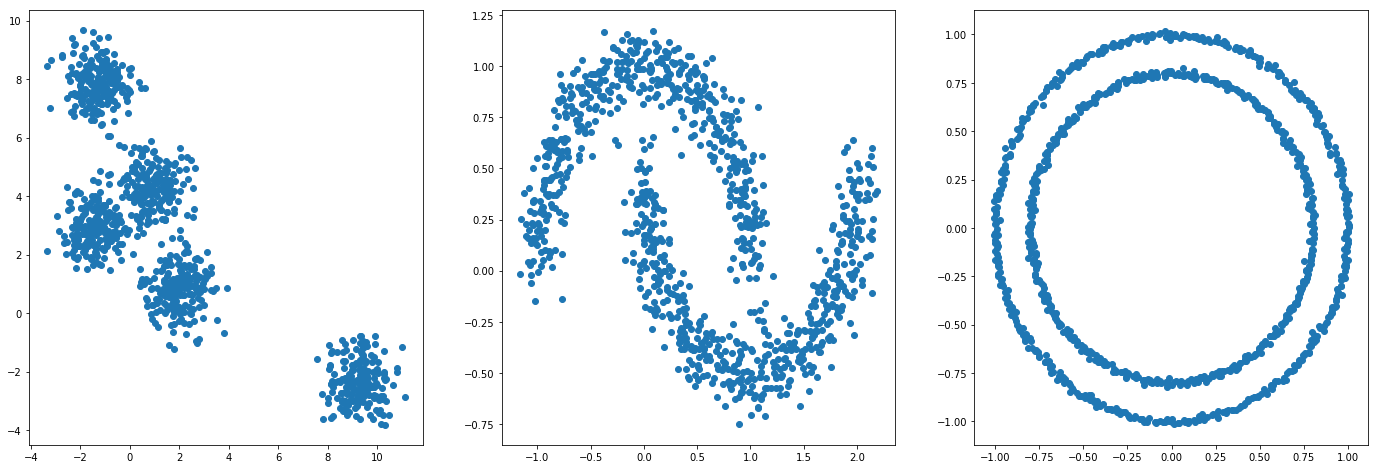

In [3]:
fig, axes = plt.subplots(1,3,figsize=(24,8))

for i,X in enumerate([X1,X2,X3]):
    axes[i].scatter(X[:,0],X[:,1])

** 2. ** In each case evalualte how we'll each clustering methods did using accuracy?

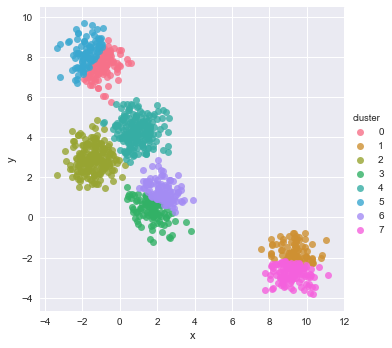

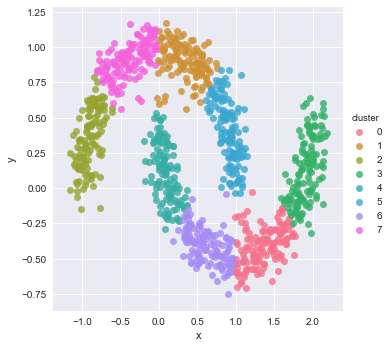

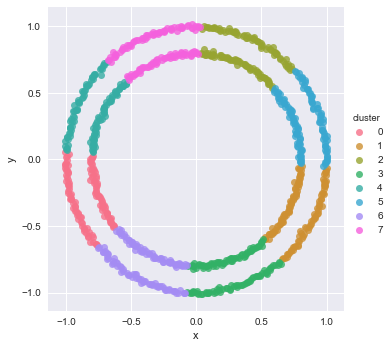

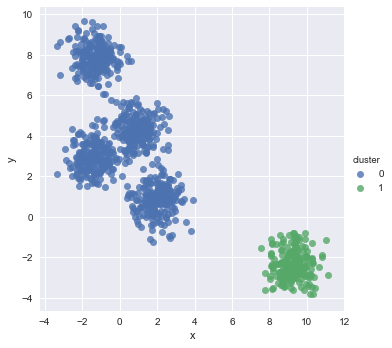

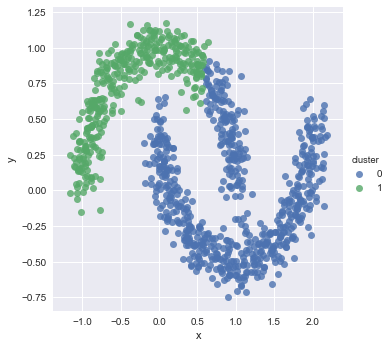

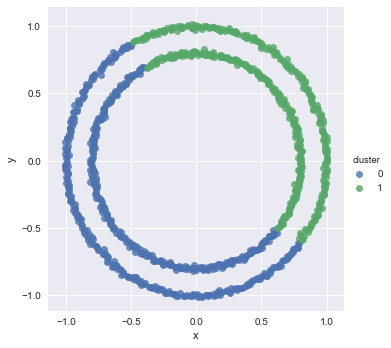

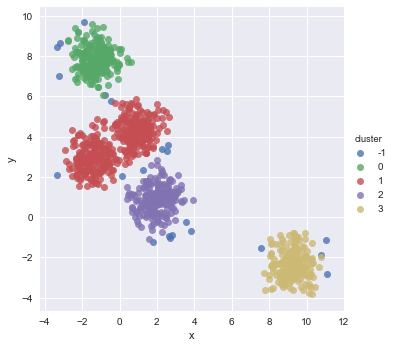

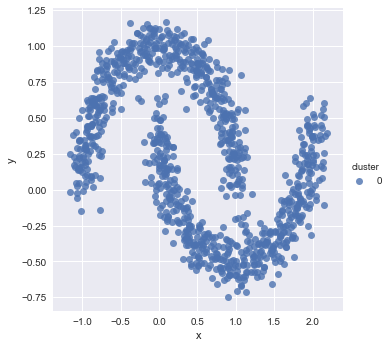

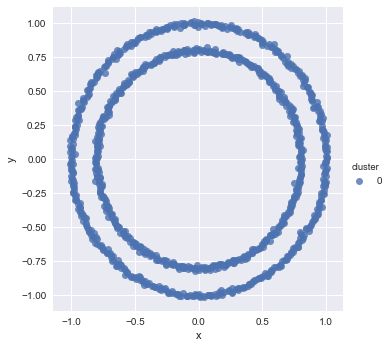

In [45]:
models = [KMeans, AgglomerativeClustering,DBSCAN]

for model in models:
    for X_i , y_i in zip([X1, X2, X3],[y1, y2, y3]):
        imodel = model()
        #imodel.fit(X1)
        cluster = imodel.fit_predict(X_i)
        pdata = pd.DataFrame( data = X_i,
                            columns = ['x','y']
                            )
        pdata['cluster'] = cluster
        pdata['actual'] = y_i
        sns.lmplot( x= 'x', y = 'y', hue = 'cluster', data = pdata, fit_reg= False)
        #sns.lmplot( x= 'x', y = 'y', hue = 'actual', data = pdata, fit_reg= False)


** 3. ** For each case which algorithm did best? Can you expalin why?

From `2` looks like:
1. K-means
2. AgglomerativeClustering
3. AgglomerativeClustering

** 4. ** Pick one algorithm and tweak it's parameters, can you improve the accuracy?

### JHo's Note
[Agglomerative Clustering Tutorial](https://chrisalbon.com/machine_learning/clustering/agglomerative_clustering/)  
[DB Scan](https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80)

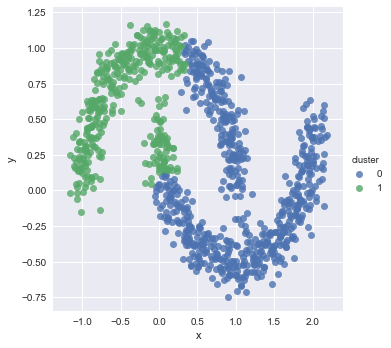

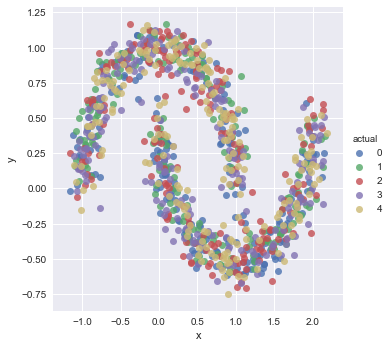

In [50]:
imodel = AgglomerativeClustering(n_clusters= 2, linkage='complete', affinity='euclidean')
X_i, y_i = X2, y1

cluster = imodel.fit_predict(X_i)
pdata = pd.DataFrame( data = X_i,
                    columns = ['x','y']
                    )
pdata['cluster'] = cluster
pdata['actual'] = y_i
sns.lmplot( x= 'x', y = 'y', hue = 'cluster', data = pdata, fit_reg= False)
sns.lmplot( x= 'x', y = 'y', hue = 'actual', data = pdata, fit_reg= False)

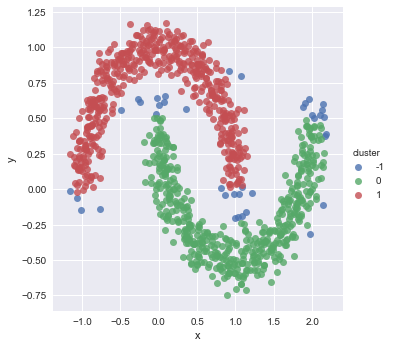

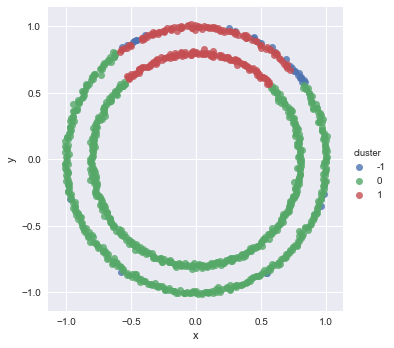

In [66]:
imodel = DBSCAN(eps=0.2 , min_samples= 48)

for X_i, y_i in zip( [X2,X3], [y2,y3]):

    cluster = imodel.fit_predict(X_i)
    pdata = pd.DataFrame( data = X_i,
                        columns = ['x','y']
                        )
    pdata['cluster'] = cluster
    pdata['actual'] = y_i
    sns.lmplot( x= 'x', y = 'y', hue = 'cluster', data = pdata, fit_reg= False)


# Colour Compresion


A intresting application of clustering is colour compression. We can use k-means to cluster the pixels by there colour. After clustering we take the centroid, which will be the average of all of the pixels colour in a cluster, and use that as our new colour.

In [10]:
from sklearn.datasets import load_sample_image

In [11]:
import matplotlib.image as mpimg

(-0.5, 639.5, 426.5, -0.5)

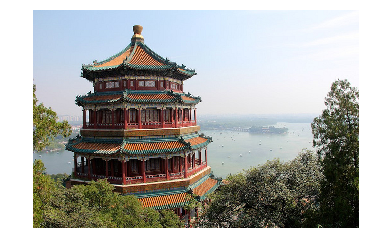

In [15]:
img = load_sample_image('china.jpg')
img = img / 255 # scale values
plt.imshow(img)
plt.axis('off')

** 1. ** Reshape the image to ((height * width ), n_channels).

** 2. ** Fit kmeans on the model and predict what cluster each pixel is in.

** 3. ** What is the shape of the clusters cluster centers, and why is it this shape? What do the centroids represent ?

We can use our prediction to index into 

In [37]:
img_new = kmeans.cluster_centers_[y_pred]

** 5. ** Reshape the image back to it's original size and plot it.

(-0.5, 639.5, 426.5, -0.5)

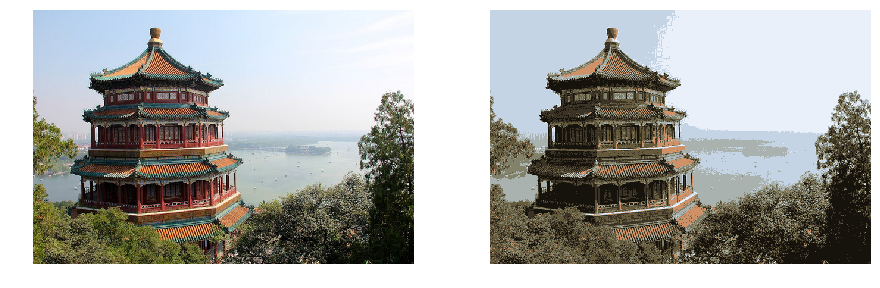

In [41]:
fig, axes = plt.subplots(1,2,figsize=(15,30))
axes[0].imshow(img)
axes[1].imshow(img_new)
axes[0].axis('off')
axes[1].axis('off')